In [1]:
addprocs(2)

2-element Array{Int64,1}:
 2
 3

In [2]:
@everywhere push!(LOAD_PATH, "..")

In [3]:
using PyPlot
using AffineTransforms

In [84]:
@everywhere reload("Ev3")
@everywhere import Ev3

In [89]:
@everywhere hostnames = ["192.168.1.27", "192.168.1.25"]
@everywhere initial_poses = [AffineTransforms.tformeye(2), 
    AffineTransforms.tformtranslate([4.0, 1.5]) *
    AffineTransforms.tformrotate(pi/2)]

In [92]:
maps = @sync @parallel (vcat) for i = 1:2
    robot = Ev3.default_remote_robot(hostnames[i])
    local_map = Ev3.run_mapping(robot, timeout=30, initial_pose=initial_poses[i])
    local_map
end
maps = vcat(maps)
nothing

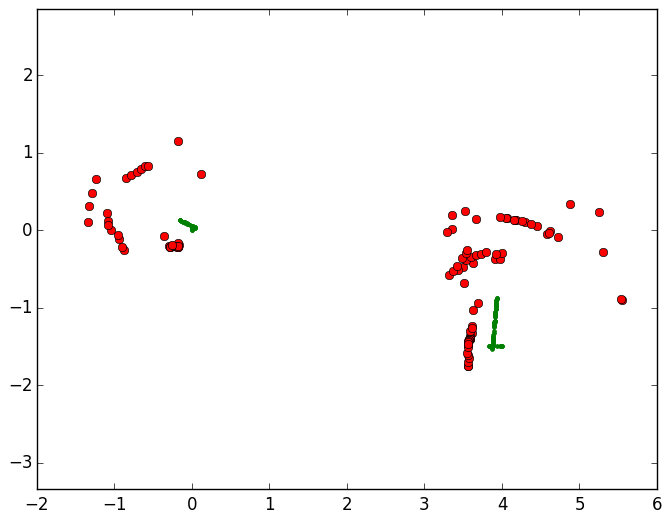

In [93]:
cla()
hold(true)
for m in maps
    plot([x[1] for x in m.points], [x[2] for x in m.points], "ro")
    plot([x.offset[1] for x in m.path], [x.offset[2] for x in m.path], "g.-")
    axis("equal")
end